In [2]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]:
    data = io.loadmat("data/%s_data.mat" % data_name)
    print("\nloaded %s data!" % data_name)
    fields = "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)
from sklearn.metrics import accuracy_score
import pandas as pd


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


No help from other student

“I certify that all solutions are entirely in my own words and that I have not looked at another student’s solutions. I have given credit to all external sources I consulted.”
Sign: Yao Liang

In [3]:
def partition1():
    data_name = "mnist"
    data = io.loadmat("data/%s_data.mat" % data_name)
    train = data['training_data']
    size = train.shape[0] - 10000
    idx = np.random.choice(train.shape[0], size, replace=False)
    train_data = train[idx]
    train_labels = data['training_labels'][idx]
    val_data = train[[i for i in range(train.shape[0]) if i not in idx]]
    val_labels = data['training_labels'][[i for i in range(train.shape[0]) if i not in idx]]
    return train_data, train_labels, val_data, val_labels

In [4]:
q1a = partition1()

In [5]:
def partition2():
    data_name = "spam"
    data = io.loadmat("data/%s_data.mat" % data_name)
    train = data['training_data']
    size = int(train.shape[0]*0.8)
    idx = np.random.choice(train.shape[0], size, replace=False)
    train_data = train[idx]
    train_labels = data['training_labels'][idx]
    val_data = train[[i for i in range(train.shape[0]) if i not in idx]]
    val_labels = data['training_labels'][[i for i in range(train.shape[0]) if i not in idx]]
    return train_data, train_labels, val_data, val_labels

In [6]:
q1b = partition2()

In [7]:
def partition3():
    data_name = "cifar10"
    data = io.loadmat("data/%s_data.mat" % data_name)
    train = data['training_data']
    size = train.shape[0] - 5000
    idx = np.random.choice(train.shape[0], size, replace=False)
    train_data = train[idx]
    train_labels = data['training_labels'][idx]
    val_data = train[[i for i in range(train.shape[0]) if i not in idx]]
    val_labels = data['training_labels'][[i for i in range(train.shape[0]) if i not in idx]]
    return train_data, train_labels, val_data, val_labels

In [8]:
q1c = partition3()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


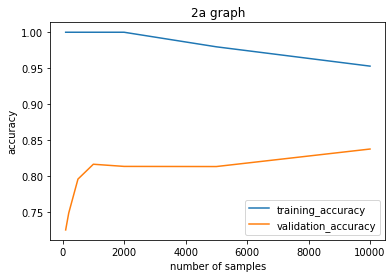

In [9]:
accuracy = []
accuracy2 = []
for i in [100, 200, 500, 1000, 2000, 5000, 10000]:
    model = svm.LinearSVC(max_iter= 20000)
    model.fit(q1a[0][:i], q1a[1].reshape(-1)[:i])
    y_pred = model.predict(q1a[0][:i])
    accuracy.append(accuracy_score(q1a[1].reshape(-1)[:i], y_pred))
    y_pred = model.predict(q1a[2])
    accuracy2.append(accuracy_score(q1a[3].reshape(-1), y_pred))
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000], accuracy, label = 'training_accuracy')
plt.plot([100, 200, 500, 1000, 2000, 5000, 10000], accuracy2, label = 'validation_accuracy')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.title('2a graph')
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


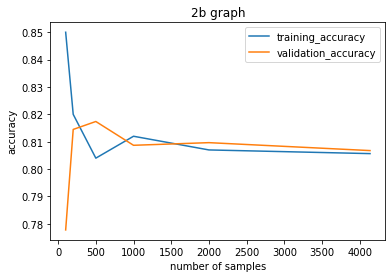

In [10]:
accuracy = []
accuracy2 = []
for i in [100, 200, 500, 1000, 2000, q1b[0].shape[0]]:
    model = svm.LinearSVC(max_iter= 20000)
    model.fit(q1b[0][:i], q1b[1].reshape(-1)[:i])
    y_pred = model.predict(q1b[0][:i])
    accuracy.append(accuracy_score(q1b[1].reshape(-1)[:i], y_pred))
    y_pred = model.predict(q1b[2])
    accuracy2.append(accuracy_score(q1b[3].reshape(-1), y_pred))
plt.plot([100, 200, 500, 1000, 2000, q1b[0].shape[0]], accuracy, label = 'training_accuracy')
plt.plot([100, 200, 500, 1000, 2000, q1b[0].shape[0]], accuracy2, label = 'validation_accuracy')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.title('2b graph')
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

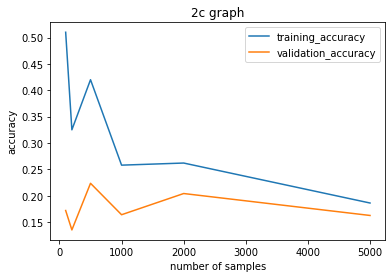

In [11]:
accuracy = []
accuracy2 = []
for i in [100, 200, 500, 1000, 2000, 5000]:
    model = svm.LinearSVC(max_iter= 2)
    model.fit(q1c[0][:i], q1c[1].reshape(-1)[:i])
    y_pred = model.predict(q1c[0][:i])
    accuracy.append(accuracy_score(q1c[1].reshape(-1)[:i], y_pred))
    y_pred = model.predict(q1c[2])
    accuracy2.append(accuracy_score(q1c[3].reshape(-1), y_pred))
plt.plot([100, 200, 500, 1000, 2000, 5000], accuracy, label = 'training_accuracy')
plt.plot([100, 200, 500, 1000, 2000, 5000], accuracy2, label = 'validation_accuracy')
plt.xlabel('number of samples')
plt.ylabel('accuracy')
plt.title('2c graph')
plt.legend()

In [12]:
for i in [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    model = svm.LinearSVC(max_iter= 20000, C = i)
    model.fit(q1a[0][:10000], q1a[1].reshape(-1)[:10000])
    y_pred = model.predict(q1a[2])
    print("C:", i, " ", "validation accuracy:", accuracy_score(q1a[3].reshape(-1), y_pred))

KeyboardInterrupt: 

In [14]:
print("Best C: 0.01")

Best C: 0.01


In [75]:
data_name = "spam"
data = io.loadmat("data/%s_data.mat" % data_name)
train = data['training_data']
labels = data['training_labels']
idx = np.random.permutation(train.shape[0])
folds = [0, 0, 0, 0, 0]
label_folds = [0, 0 ,0, 0, 0]
folds[0] = train[idx[:1034]]
folds[1] = train[idx[1034:2068]]
folds[2] = train[idx[2068:3102]]
folds[3] = train[idx[3102:4136]]
folds[4] = train[idx[4136:5172]]
label_folds[0] = labels[idx[:1034]]
label_folds[1] = labels[idx[1034:2068]]
label_folds[2] = labels[idx[2068:3102]]
label_folds[3] = labels[idx[3102:4136]]
label_folds[4] = labels[idx[4136:5172]]
scores = []
for i in [0.01, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1]:
    temp_score = []
    for j in range(5):
        model = svm.LinearSVC(max_iter= 35000, C = i)
        count = 0
        for z in range(5):
            if z != j:
                if count != 0:
                    temp_train = np.concatenate((temp_train, folds[z]))
                    temp_label = np.concatenate((temp_label, label_folds[z]))
                else:
                    temp_train = folds[z]
                    temp_label = label_folds[z]
                    count += 1
        model.fit(temp_train, temp_label.reshape(-1))
        y_pred = model.predict(folds[j])
        temp_score.append(accuracy_score(label_folds[j].reshape(-1), y_pred))
    print("C:", i, ":", np.mean(temp_score))

C: 0.01 : 0.7948567246439587
C: 0.05 : 0.8014331269650418


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 0.1 : 0.8008532295766339


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 0.2 : 0.8016258037534634


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 0.4 : 0.8012393299627343


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

C: 0.6 : 0.8020126509488211


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Ver

C: 0.8 : 0.802399498144179


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C: 1 : 0.8025929217418579


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [74]:
print("Best C: 1")

Best C: 1


In [7]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [8]:
data_name = "mnist"
data = io.loadmat("data/%s_data.mat" % data_name)
train = data['training_data']
labels = data['training_labels']
test = data['test_data']
model = svm.SVC(C = 0.1, cache_size= 2000)
model.fit(train, labels.reshape(-1))
y_pred = model.predict(train)
print(accuracy_score(labels.reshape(-1), y_pred))
y_pred = model.predict(test)
results_to_csv(y_pred)

0.9622166666666667


In [17]:
data_name = "spam"
data = io.loadmat("data/%s_data.mat" % data_name)
train = data['training_data']
labels = data['training_labels']
test = data['test_data']
model = svm.LinearSVC(max_iter= 100000, C = 0.1)
model.fit(train, labels.reshape(-1))
y_pred = model.predict(train)
print(accuracy_score(labels.reshape(-1), y_pred))
y_pred = model.predict(test)
results_to_csv(y_pred)

0.8033642691415314


In [18]:
data_name = "cifar10"
data = io.loadmat("data/%s_data.mat" % data_name)
train = data['training_data']
labels = data['training_labels']
test = data['test_data']
model = svm.SVC(C = 0.1, cache_size= 2000)
model.fit(train, labels.reshape(-1))
y_pred = model.predict(test)
results_to_csv(y_pred)

Kaggle Name: Yao Liang. Kaggle Score: MNIST: 0.95950, SPAM: 0.83609, CIFAR-10: 0.45820.


I have tried different kernel functions, including rbf and linear. I also adjust the value of hyperparameter C. I also used LinearSVC when the kernel used is linear to speed up process time. I also adjust size of training set. Use rbf kernel helped perform a lot better for mnist dataset. In contrast, use linear helped perform a lot better for spam dataset. I also increased max_iter in LinearSVC to reach convergence, but the accuracy did not change much. Changing value of C to smaller values helped generalize to higher accuracy on test data. Larger size of training set lead to higher accuracy.